# Genetic Optimization (GO) 

__p parameter only, others are default__

In [1]:
# Import path to source directory (bit of a hack in Jupyter)
import sys
import os
pwd = %pwd
sys.path.append(os.path.join(pwd, os.path.join('..', 'src')))

# Ensure modules are reloaded on any change (very useful when developing code on the fly)
%load_ext autoreload
%autoreload 2

In [2]:
# Import external libraries
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

In [3]:
# initialization
from objfun_node2vec import N2V
n2v = N2V('../data/clear_cluster_test/one_eighth.csv',
            '../data/clear_cluster_test/labels.csv')

__Experiment run__

In [4]:
from heur_go_single import GeneticOptimization

In [5]:
NUM_RUNS = 30 
maxeval = 30 

In [6]:
# traditional testing procedure setup
def experiment_go(of, maxeval, num_runs, N):
    results = []
    heur_name = 'GO_{}'.format(N)
    for i in tqdm(range(num_runs), 'Testing {}'.format(heur_name)):
        result = GeneticOptimization(of, maxeval, N=N).search()
        result['run'] = i
        result['heur'] = heur_name
        result['N'] = N
        results.append(result)
    return pd.DataFrame(results, columns=['heur', 'run', 'N', 'best_x', 'best_y', 'neval'])

In [7]:
results = pd.DataFrame()
for N in [2,4,8,10,12]:
    res = experiment_go(of=n2v, maxeval=maxeval, num_runs=NUM_RUNS, N=N)
    results = pd.concat([results, res], axis=0)

In [8]:
results

heur  run   N                                        best_x    best_y  \
0    GO_2    0   2   [2.1096145550275365, 1.0, 10.0, 80.0, 10.0]  0.787402   
1    GO_2    1   2    [5.406763705516038, 1.0, 10.0, 80.0, 10.0]  0.566901   
2    GO_2    2   2    [6.083772113979549, 1.0, 10.0, 80.0, 10.0]  0.556818   
3    GO_2    3   2    [5.452167619267909, 1.0, 10.0, 80.0, 10.0]  0.619565   
4    GO_2    4   2   [1.6464334419540574, 1.0, 10.0, 80.0, 10.0]  0.720930   
..    ...  ...  ..                                           ...       ...   
25  GO_12   25  12   [0.5043332113513395, 1.0, 10.0, 80.0, 10.0]  1.000000   
26  GO_12   26  12  [0.32464281635943393, 1.0, 10.0, 80.0, 10.0]  1.000000   
27  GO_12   27  12   [0.6582961854049905, 1.0, 10.0, 80.0, 10.0]  0.892857   
28  GO_12   28  12   [0.5924579876201292, 1.0, 10.0, 80.0, 10.0]  0.892857   
29  GO_12   29  12    [1.504091456731115, 1.0, 10.0, 80.0, 10.0]  0.702381   

    neval  
0     inf  
1     inf  
2     inf  
3     inf  
4     inf  
..    ...  
25    1.0  
26   19.0  
27    inf  
28    inf  
29    inf  

[150 rows x 6 columns]

In [9]:
# import visualization libraries
import matplotlib
# %matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

__Number of evaluations (when successful), based on N?__

In [10]:
results['success'] = results['neval'] < np.inf

In [11]:
results[results['success'] == True].head()

heur  run  N                                       best_x  best_y  neval  \
7   GO_2    7  2   [1.101478869459827, 1.0, 10.0, 80.0, 10.0]     1.0    1.0   
9   GO_2    9  2  [0.6393074906685065, 1.0, 10.0, 80.0, 10.0]     1.0   10.0   
13  GO_2   13  2  [0.2781444936754536, 1.0, 10.0, 80.0, 10.0]     1.0    1.0   
18  GO_2   18  2  [0.5971517792573391, 1.0, 10.0, 80.0, 10.0]     1.0    6.0   
25  GO_2   25  2   [0.520508948237774, 1.0, 10.0, 80.0, 10.0]     1.0    1.0   

    success  
7      True  
9      True  
13     True  
18     True  
25     True

In [12]:
results[results['success'] == True].groupby(['N'])['neval'].mean()

N
2      3.500000
4     14.500000
8     15.285714
10    13.545455
12     5.428571
Name: neval, dtype: float64

In [13]:
results[results['success'] == True].groupby(['N'])['neval'].median()

N
2      1.5
4     14.5
8     21.0
10     7.0
12     1.0
Name: neval, dtype: float64

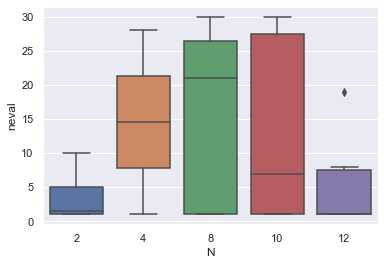

In [14]:
ax2 = sns.boxplot(x="N", y="neval", data=results[results['success'] == True])

In [15]:
# performance criteria
def rel(x):
    return len([n for n in x if n < np.inf])/len(x)
def mne(x):
    return np.mean([n for n in x if n < np.inf])
def feo(x):
    return mne(x)/rel(x)

In [16]:
results_pivot = results.pivot_table(
    index=['heur', 'N'],
    values=['neval'],
    aggfunc=(rel, mne, feo)
)['neval']
results_pivot = results_pivot.reset_index()
results_pivot.sort_values(by='N')

heur   N         feo        mne       rel
2   GO_2   2   17.500000   3.500000  0.200000
3   GO_4   4  217.500000  14.500000  0.066667
4   GO_8   8   65.510204  15.285714  0.233333
0  GO_10  10   36.942149  13.545455  0.366667
1  GO_12  12   23.265306   5.428571  0.233333

In [18]:
results_pivot.sort_values(by=['feo']).head(3)

heur   N        feo        mne       rel
2   GO_2   2  17.500000   3.500000  0.200000
1  GO_12  12  23.265306   5.428571  0.233333
0  GO_10  10  36.942149  13.545455  0.366667

## Conclusion